# Набор данных об эмоциях

*О наборе данных*

Набор данных для задач распознавания эмоциональной окраски текстов
На вход подаётся текст сообщения, а на выходе модель должна определить одну из шести базовых эмоций, выраженных в тексте
Все данные уже предобработаны в соответствии с методикой, описанной авторами исследования.

*Характеристики:*

Текст сообщения
Метка: целевой признак, обозначает эмоциональную окраску текста


*Метки:*

Sadness (Печаль) 0

Joy (Радость) 1

Love (Любовь) 2

Anger (Гнев) 3

Fear (Страх) 4

Surprise (Удивление) 5

*Цели испозования:*

Датасет предназначен для обучения моделей распознавания эмоциональной окраски текста

Основные задачи, которые можно решить с его помощью:
Классификация текстов по эмоциям,
Анализ чувств пользователей (Sentiment Analysis),
Мониторинг обратной связи клиентов,
Социальные исследования и анализ настроений в социальных сетях

[Ссылка на датасет](https://www.kaggle.com/datasets/parulpandey/emotion-dataset/data)


# 1. Анализ данных датасета

In [6]:
def coolPrinting(title, data):
    print(f"\n --- {title} --- \n")
    print(data)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import f1_score

train_path = './dataset/training.csv'
test_path = './dataset/test.csv'
validation_path = './dataset/validation.csv'

# Загрузка датасетов
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
validation_df = pd.read_csv(validation_path)

coolPrinting("Training Dataset (первые 5 записей)", train_df.head())
coolPrinting("Test Dataset (первые 5 записей)", test_df.head())
coolPrinting("Validation Dataset (первые 5 записей)", validation_df.head())

# Проверка на пропуски
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()
validation_missing = validation_df.isnull().sum()

coolPrinting("Пропущенные значения в Training Dataset", train_missing)
coolPrinting("Пропущенные значения в Test Dataset", test_missing)
coolPrinting("Пропущенные значения в Validation Dataset", validation_missing)

# Подсчет количества записей для каждой эмоции в каждом датасете
train_emotion_counts = train_df['label'].value_counts()
test_emotion_counts = test_df['label'].value_counts()
validation_emotion_counts = validation_df['label'].value_counts()

coolPrinting("Количество записей для каждой эмоции в Training Dataset", train_emotion_counts)
coolPrinting("Количество записей для каждой эмоции в Test Dataset", test_emotion_counts)
coolPrinting("Количество записей для каждой эмоции в Validation Dataset", validation_emotion_counts)

# Анализ длины текстов в каждом датасете
train_text_length = train_df['text'].apply(len).describe()
test_text_length = test_df['text'].apply(len).describe()
validation_text_length = validation_df['text'].apply(len).describe()

coolPrinting("Длина текстов в Training Dataset", train_text_length)
coolPrinting("Длина текстов в Test Dataset", test_text_length)
coolPrinting("Длина текстов в Validation Dataset", validation_text_length)


 --- Training Dataset (первые 5 записей) --- 

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

 --- Test Dataset (первые 5 записей) --- 

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0

 --- Validation Dataset (первые 5 записей) --- 

                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i a

C:\Users\mimim\AppData\Local\Temp\ipykernel_16676\775814136.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_emotion_counts.index, y=train_emotion_counts.values, palette='muted')
C:\Users\mimim\AppData\Local\Temp\ipykernel_16676\775814136.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_emotion_counts.index, y=test_emotion_counts.values, palette='muted')
C:\Users\mimim\AppData\Local\Temp\ipykernel_16676\775814136.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=validation_emotion_counts.index, y=validation_emotion

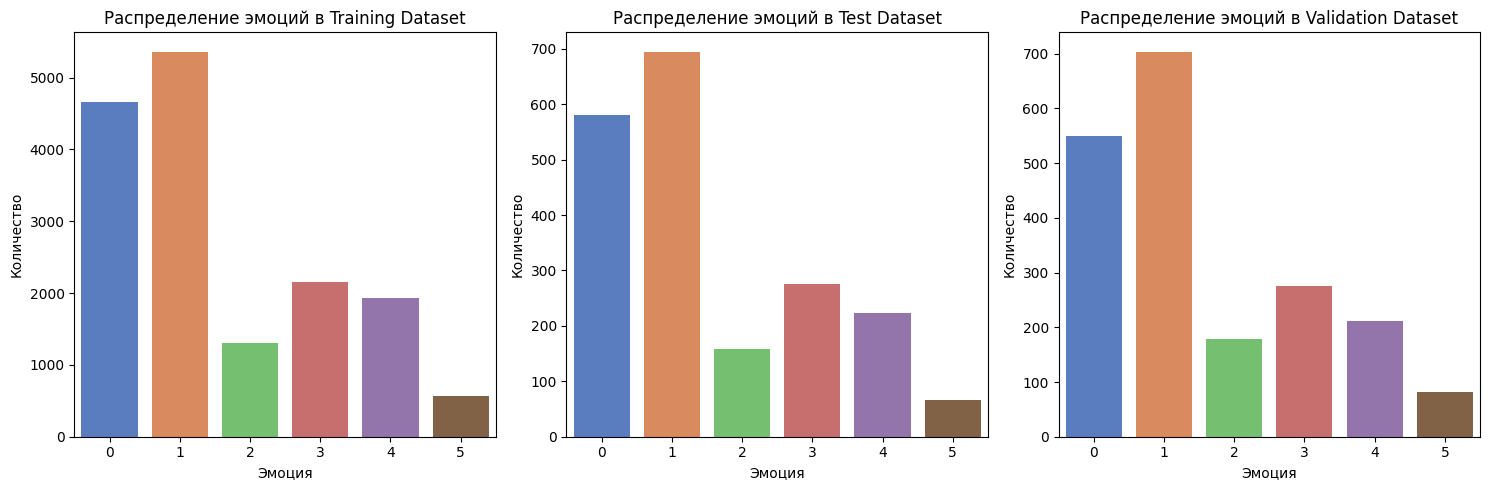

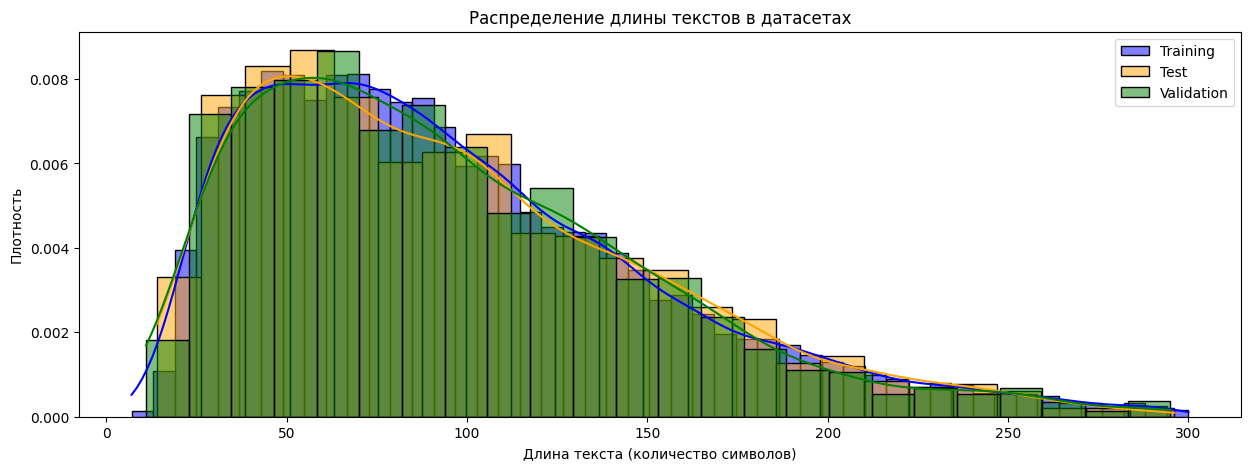

In [72]:
# Визуализация распределения меток
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=train_emotion_counts.index, y=train_emotion_counts.values, palette='muted')
plt.title('Распределение эмоций в Training Dataset')
plt.xlabel('Эмоция')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
sns.barplot(x=test_emotion_counts.index, y=test_emotion_counts.values, palette='muted')
plt.title('Распределение эмоций в Test Dataset')
plt.xlabel('Эмоция')
plt.ylabel('Количество')

plt.subplot(1, 3, 3)
sns.barplot(x=validation_emotion_counts.index, y=validation_emotion_counts.values, palette='muted')
plt.title('Распределение эмоций в Validation Dataset')
plt.xlabel('Эмоция')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# Визуализация распределения длины текстов
plt.figure(figsize=(15, 5))

sns.histplot(train_df['text'].apply(len), color='blue', label='Training', kde=True, stat='density')
sns.histplot(test_df['text'].apply(len), color='orange', label='Test', kde=True, stat='density')
sns.histplot(validation_df['text'].apply(len), color='green', label='Validation', kde=True, stat='density')

plt.title('Распределение длины текстов в датасетах')
plt.xlabel('Длина текста (количество символов)')
plt.ylabel('Плотность')
plt.legend()
plt.show()


Все 3 датасета распределены равномерно, для каждого сообщения определены метки класса, в каждом датасете представлены разные типы сообщений
Можно приступать к построению моделей

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

def apply_smote(X_train_tfidf, y_train):
    pipeline = make_pipeline(
        SMOTETomek(random_state=42)  # Оверсэмплинг
    )
    X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train_tfidf, y_train)

    # Выводим распределение классов после балансировки
    print("Распределение классов после балансировки:")
    print(pd.Series(y_train_balanced).value_counts())

    return X_train_balanced, y_train_balanced


# 2. Построение моделей

Для решения задачи выбрать 3 модели. Минимум одна модель – классическое машинное обучение. Минимум одна модель – глубокий/нейросетевой подход. Выбрать функцию потерь. Выбрать критерии качества решения задачи. Произвести тренировку моделей. Выбрать наилучший.

**№1 Модель классического ML наивный Баес**

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_train = train_df['label']
X_train = train_df['text']

y_test = test_df['label']
X_test = test_df['text']

X_valid = validation_df['text']
y_valid = validation_df['label']

vectorizer = TfidfVectorizer(max_features=1050) # Преобразование текста в векторы для определения важности слов
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

X_train_tfidf, y_train = apply_smote(X_train_tfidf, y_train)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Оценка модели
y_pred = model.predict(X_test_tfidf)
coolPrinting("Отчет о классификации", classification_report(y_test, y_pred, zero_division=0))
coolPrinting("Матрица неточностей", confusion_matrix(y_test, y_pred))
coolPrinting("Точность модели", accuracy_score(y_test, y_pred))
f1_nb = f1_score(y_test, y_pred, average='weighted')
coolPrinting("F1-мера для модели Наивного Байеса", f1_nb)

# Оценка модели на валидирующей выборке
y_pred_val = model.predict(X_valid_tfidf)
coolPrinting("Отчет о классификации на валидирующей выборке", classification_report(y_valid, y_pred_val))
coolPrinting("Матрица неточностей", confusion_matrix(y_valid, y_pred_val))
coolPrinting("Точность модели", accuracy_score(y_valid, y_pred_val))

# with open('models_saved/modelNB.pkl', 'wb') as file:
#     pickle.dump(model, file)

Распределение классов после балансировки:
label
2    5362
3    5360
5    5358
4    5356
0    5345
1    5343
Name: count, dtype: int64

 --- Отчет о классификации --- 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       581
           1       0.90      0.84      0.87       695
           2       0.57      0.80      0.66       159
           3       0.79      0.84      0.81       275
           4       0.84      0.77      0.80       224
           5       0.51      0.80      0.63        66

    accuracy                           0.83      2000
   macro avg       0.76      0.82      0.78      2000
weighted avg       0.85      0.83      0.84      2000


 --- Матрица неточностей --- 

[[497  15  17  31  10  11]
 [  9 582  67  13   8  16]
 [  3  23 127   3   0   3]
 [ 11  12   9 230  11   2]
 [ 10   7   4  13 172  18]
 [  2   7   0   1   3  53]]

 --- Точность модели --- 

0.8305

 --- F1-мера для модели Наивного Байеса --- 

0.8362626318

**№2 Модель на основе метода опорных векторов (SVC)**

In [75]:
from sklearn.svm import SVC

y_train = train_df['label']
X_train = train_df['text']

y_test = test_df['label']
X_test = test_df['text']

X_valid = validation_df['text']
y_valid = validation_df['label']

vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

X_train_tfidf, y_train = apply_smote(X_train_tfidf, y_train)

model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# Оценка модели
y_pred = model.predict(X_test_tfidf)
coolPrinting("Отчет о классификации", classification_report(y_test, y_pred))
coolPrinting("Матрица неточностей", confusion_matrix(y_test, y_pred))
coolPrinting("Точность модели", accuracy_score(y_test, y_pred))
f1_svc = f1_score(y_test, y_pred, average='weighted')
coolPrinting("F1-мера для модели SVC", f1_svc)

# Оценка на валидирующей выборке
y_pred_val = model.predict(X_valid_tfidf)
coolPrinting("Отчет о классификации на валидирующей выборке", classification_report(y_valid, y_pred_val))
coolPrinting("Матрица неточностей", confusion_matrix(y_valid, y_pred_val))
coolPrinting("Точность модели", accuracy_score(y_valid, y_pred_val))

# with open('models_saved/modelSVC.pkl', 'wb') as file:
#     pickle.dump(model, file)

Распределение классов после балансировки:
label
2    5362
3    5361
5    5358
4    5357
1    5329
0    5327
Name: count, dtype: int64

 --- Отчет о классификации --- 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       581
           1       0.93      0.87      0.90       695
           2       0.67      0.91      0.78       159
           3       0.87      0.87      0.87       275
           4       0.86      0.86      0.86       224
           5       0.61      0.76      0.68        66

    accuracy                           0.87      2000
   macro avg       0.81      0.86      0.83      2000
weighted avg       0.88      0.87      0.88      2000


 --- Матрица неточностей --- 

[[515  18   6  24  12   6]
 [  8 607  60   5   5  10]
 [  2   9 145   1   0   2]
 [ 16  10   2 239   8   0]
 [  7   3   2   5 193  14]
 [  1   8   0   0   7  50]]

 --- Точность модели --- 

0.8745

 --- F1-мера для модели SVC --- 

0.8772290567540203

 ---

**№3 Нейросетевая модель глубокого обучения**

Распределение классов после балансировки:
label
2    5362
3    5361
5    5358
4    5357
1    5329
0    5327
Name: count, dtype: int64
Epoch 1/10


c:\Users\mimim\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1003/1003 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3161 - loss: 1.6310 - val_accuracy: 0.7220 - val_loss: 1.0731
Epoch 2/10
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6833 - loss: 0.8824 - val_accuracy: 0.8385 - val_loss: 0.7340
Epoch 3/10
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7414 - loss: 0.7009 - val_accuracy: 0.8490 - val_loss: 0.6022
Epoch 4/10
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7746 - loss: 0.5964 - val_accuracy: 0.8620 - val_loss: 0.5350
Epoch 5/10
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7848 - loss: 0.5603 - val_accuracy: 0.8650 - val_loss: 0.4915
Epoch 6/10
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8001 - loss: 0.5127 - val_accuracy: 0.8690 - val_loss: 0.4623
Epoch 7/10
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8056 - loss: 0.4881 - val_accuracy: 0.8710 - val_loss: 0.4563
Epoch 8/10
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8193 - loss: 0.4634 - val_accurac

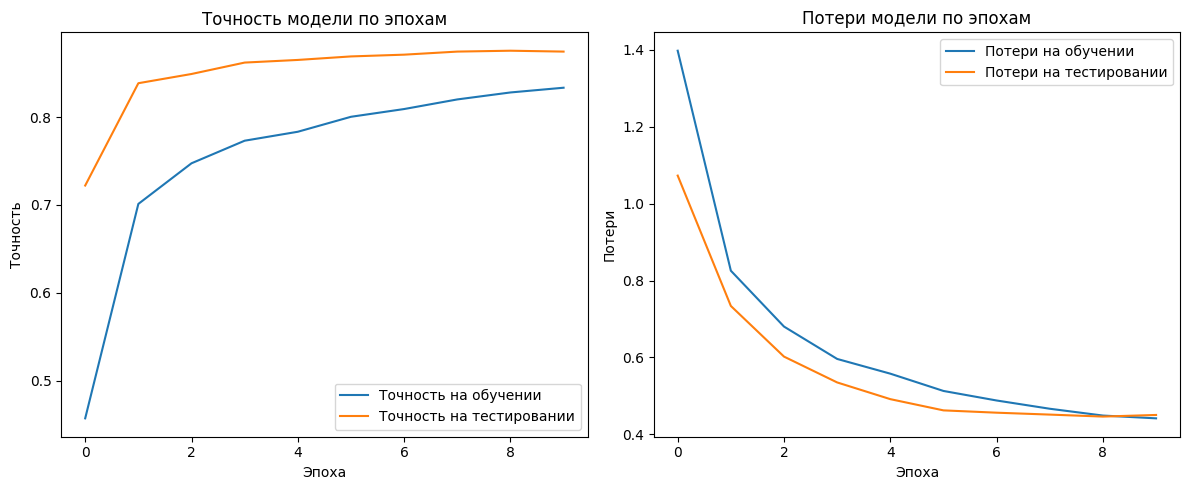

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

y_train = train_df['label']
X_train = train_df['text']

y_test = test_df['label']
X_test = test_df['text']

y_validation = validation_df['label']
X_validation = validation_df['text']

vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_validation_tfidf = vectorizer.transform(X_validation)

X_train_tfidf, y_train = apply_smote(X_train_tfidf, y_train)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_validation_categorical = to_categorical(y_validation)

# Модель глубокой нейронной сети
model = Sequential([
    Dense(8, input_shape=(X_train_tfidf.shape[1],), activation='relu'),
    Dropout(0.4),
    Dense(8, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_tfidf, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test_categorical))

# Оценка производительности модели
evaluation = model.evaluate(X_test_tfidf, y_test_categorical)
print("Оценка модели (потери и точность)", evaluation)

y_pred = model.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Отчет о классификации", classification_report(y_test, y_pred_classes))
print("Матрица неточности", confusion_matrix(y_test, y_pred_classes))
f1_neuro = f1_score(y_test, y_pred_classes, average='weighted')
coolPrinting("F1-мера для нейросетевой модели", f1_neuro)

evaluation = model.evaluate(X_validation_tfidf, y_validation_categorical)
print("Оценка модели (потери и точность) Валидирующая выборка", evaluation)

# Визуализация графиков точности и потерь
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.title('Точность модели по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на тестировании')
plt.title('Потери модели по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.tight_layout()
plt.show()

# model.save('models_saved/model_neuro.keras')
# print("Модель сохранена как model.keras")

# Выводы

MultinomialNB
Точность (Accuracy): 0.779
Precision: Варьируется от 0.72 (класс 1) до 1.00 (класс 5).
Recall: Наиболее высокий (0.98) для класса 1, наименьший (0.06) для класса 5.
F1-score: Наиболее высокий (0.86) для класса 0, наименьший (0.11) для класса 5.

SVC (Support Vector Classifier)
Точность (Accuracy): 0.883
Precision: Варьируется от 0.72 (класс 5) до 0.93 (класс 0).
Recall: Наиболее высокий (0.94) для класса 1, наименьший (0.55) для класса 5.
F1-score: Наиболее высокий (0.92) для класса 0, наименьший (0.62) для класса 5.

Нейросетевая модель:
Точность (Accuracy): 0.885
Precision: Наивысшая точность у класса 0 (0.91), что означает, что 91% предсказаний этого класса были верными. Наименьшая точность у класса 5 (0.69), что указывает на то, что модель ошибается чаще при предсказании этого класса.
Recall: Наивысшая полнота у класса 1 (0.93), что говорит о том, что 93% всех истинных примеров этого класса были правильно предсказаны. Наименьшая полнота у класса 5 (0.58).
F1-score: Наивысший F1-score у класса 0 (0.92), что говорит о сбалансированности между точностью и полнотой. Наименьший F1-score у класса 5 (0.63), что указывает на необходимость улучшения модели для этого класса.

Наилучшие результаты: Нейросетевая модель и Модель SVC показали наилучшие результаты по точности (~0.88) и сбалансированным показателям для всех классов.
Проблемные классы: Все модели испытывают трудности с классом 5, что требует увеличения количества входных данных с более равномерным распределением по классам.


# Выводы Балансировки

MultinomialNB
После балансировки, получили повышение точности модели на 4.2%

SVC (Support Vector Classifier)
После балансировки, получили ухудшение точности модели на 0.55%

Нейросетевая модель
После балансировки, получили повышение точности модели на 0.3%

Можно сделать вывод, что балансировка помогла лишь для MultinomialNB увеличив точность модели на 4.2%

# Применим токенизатор и предобученную модель

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np
from tqdm import tqdm

# Установка устройства (GPU, если доступен)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Загрузка токенизатора и модели
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=6
).to(device)

# Функция токенизации текста
def tokenize_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Токенизация данных
X_train_tokens = tokenize_texts(train_df['text'], tokenizer)
X_test_tokens = tokenize_texts(test_df['text'], tokenizer)
X_validation_tokens = tokenize_texts(validation_df['text'], tokenizer)

y_train = torch.tensor(train_df['label'].values)
y_test = torch.tensor(test_df['label'].values)
y_validation = torch.tensor(validation_df['label'].values)

train_data = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], y_train)
train_sampler = RandomSampler(train_data)
train_loader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

test_data = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], y_test)
test_loader = DataLoader(test_data, sampler=SequentialSampler(test_data), batch_size=32)

validation_data = TensorDataset(X_validation_tokens['input_ids'], X_validation_tokens['attention_mask'], y_validation)
validation_loader = DataLoader(validation_data, sampler=SequentialSampler(validation_data), batch_size=32)

# Оптимизатор и функция потерь
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

def train_model(model, train_loader, optimizer, criterion, device, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in tqdm(train_loader, desc=f"Эпоха {epoch + 1}/{epochs}"):
            input_ids, attention_mask, labels = [b.to(device) for b in batch]

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        print(f"Средние потери за эпоху {epoch + 1}: {total_loss / len(train_loader)}")

# Функция оценки модели
def evaluate_model(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, axis=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

# Обучение модели
for param in model.bert.parameters():
    param.requires_grad = False

train_model(model, train_loader, optimizer, criterion, device, epochs=3)
y_pred, y_true = evaluate_model(model, test_loader, device)

print("Отчет о классификации", classification_report(y_true, y_pred))
print("Матрица неточности", confusion_matrix(y_true, y_pred))
f1_neuro = f1_score(y_true, y_pred, average='weighted')
print(f"F1-мера для модели BERT: {f1_neuro:.4f}")

# Оценка модели на валидационной выборке
y_pred_val, y_true_val = evaluate_model(model, validation_loader, device)

print("Оценка модели на валидационной выборке")
print("Отчет о классификации", classification_report(y_true_val, y_pred_val))
print("Матрица неточности", confusion_matrix(y_true_val, y_pred_val))


cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AssertionError: Torch not compiled with CUDA enabled